<a href="https://colab.research.google.com/github/susan-programmer/portfolio/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


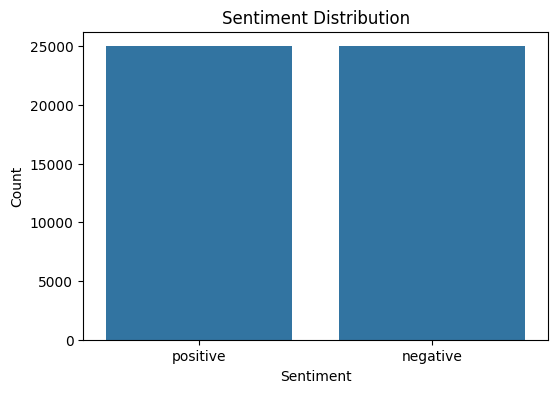


Model Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Sample Predictions:


ValueError: array length 5 does not match index length 10

In [3]:
# Install required libraries (if needed)
!pip install pandas numpy scikit-learn matplotlib seaborn nltk

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources
nltk.download('punkt')        # For tokenization
nltk.download('punkt_tab')    # Updated tokenizer resource
nltk.download('stopwords')    # For stopwords

# Load the IMDB dataset (simplified version from a public source)
url = "https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv"
data = pd.read_csv(url)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Dataset info
print("\nDataset Info:")
print(data.info())

# Check the distribution of sentiments
print("\nSentiment Distribution:")
print(data['sentiment'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back to text
    return ' '.join(tokens)

# Apply preprocessing to the reviews
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Split features (X) and target (y)
X = data['cleaned_review']
y = data['sentiment']

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Build and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display a few sample predictions
print("\nSample Predictions:")
samples = pd.DataFrame({
    'Review': data['review'].iloc[-5:],
    'Actual Sentiment': y_test[-5:],
    'Predicted Sentiment': y_pred[-5:]
})
print(samples)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First 5 rows of the dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


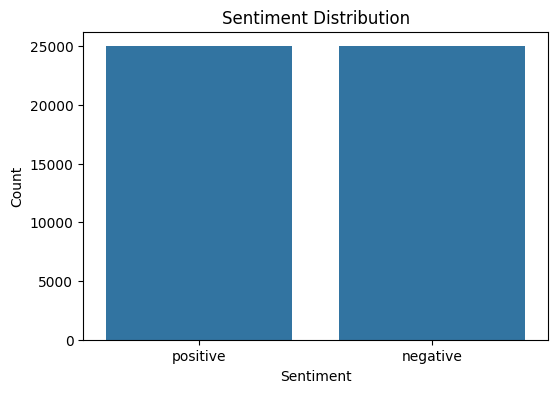


Model Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000


Sample Predictions:
                                    Review (Cleaned) Actual Sentiment  \
0  one scenes fact around ever get sense michael ...         negative   
1  watching really comes boy movie like love good...         positive   
2  one right first thing show given would ever ge...         positive   
3  one watching br set word go use city far would...         negative   
4  one first saw little see really thought charac...         positive   

  Predicted Sentiment  
0            negative  
1            positive  
2            positive  
3            negative  
4            positive  


In [4]:
# Install required libraries (if needed)
!pip install pandas numpy scikit-learn matplotlib seaborn nltk

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the IMDB dataset
url = "https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv"
data = pd.read_csv(url)

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Dataset info
print("\nDataset Info:")
print(data.info())

# Check the distribution of sentiments
print("\nSentiment Distribution:")
print(data['sentiment'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back to text
    return ' '.join(tokens)

# Apply preprocessing to the reviews
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Split features (X) and target (y)
X = data['cleaned_review']
y = data['sentiment']

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Build and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nModel Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Convert X_test back to text for display (using inverse transform)
X_test_text = vectorizer.inverse_transform(X_test[-5:])
X_test_text = [' '.join(words) for words in X_test_text]

# Display a few sample predictions
print("\nSample Predictions:")
samples = pd.DataFrame({
    'Review (Cleaned)': X_test_text,
    'Actual Sentiment': y_test[-5:].values,
    'Predicted Sentiment': y_pred[-5:]
})
print(samples)